In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import sampling

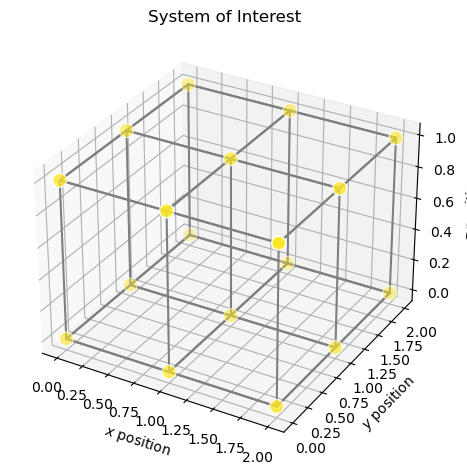

There are 18 nodes in the graph.


In [2]:
G = sampling.Graph(dimensions=[3,3,2])
G.init_edges(periodic_boundary=True)

G.plot()

# ferromagnetic edges:
J = {e:1.0 for e in G.edges()}
G.set_couplings(J)

n = len(G.nodes())
print("There are",n,"nodes in the graph.")

number of nodes:  18
number of possible states:  262144
System temperature T: 3.0


partition function Z: 16959797.95112089


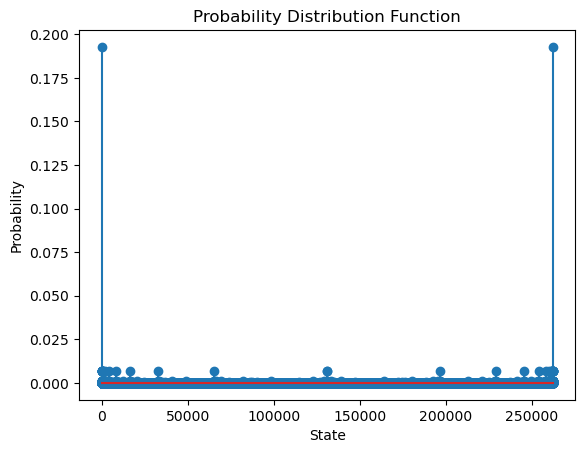

In [3]:
# WARNING!  Only run this cell if n<=20 (ish)


n = len(G.nodes())
N = 2**n
print("number of nodes: ", n)
print("number of possible states: ", N)



spin_config = np.zeros(n) # init



# calculate the probability distribution explicitly.
probability_of_state = np.zeros(N) # init
Z = 0.0 # init the "partition function"



# The critical temperature if J_ij == 1 (TODO: verify this...)
# T_c = 2/np.log(1+np.sqrt(2))
# print("Critical temperature T_c:",T_c)


T = 3.0 # set Temperature T
print("System temperature T:",T)

k_B = 1.0 # set Boltzmann constant
beta = 1/(k_B*T)



for state_index in range(N):
    spin_config = sampling.convert_state_index_to_spin_config(n,state_index)
    G.set_spins(spin_config)
    E_state = G.energy()
   
    probability_of_state[state_index] = np.exp(-beta*E_state)
    

Z = sum(probability_of_state) # calculate partition function
probability_of_state *= (1/Z) # normalize by partition function

print("partition function Z:",Z)
plt.stem(probability_of_state)
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Probability Distribution Function")
plt.show()

